## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load simulation results

In [2]:
dynamics_df = pd.read_csv("dynamics_df_base.csv")
census_df = pd.read_csv("census_df_base.csv")
weekly_hosp_df = pd.read_csv("weekly_hosp_df_base.csv")
virus_names = ["covid", "flu", "rsv"]
age_groups = ["infant", "preschool", "child", "adult", "senior"]

## Function for plotting curves

In [ ]:
def plot_curves(fields, titles, log_scale=False, smoothed=False, window_size=7,
                confidence_interval=True, percentile_band=False, min_sims=25, 
                xlim=None, ylim=None, common_x_axis=False, common_y_axis=False):
    f, ax = plt.subplots(1, len(virus_names), sharex=common_x_axis, sharey=common_y_axis, figsize=(15,4))

    # Determine valid days based on simulation count
    sim_counts = dynamics_df["n_sims"]
    valid_days = sim_counts[sim_counts >= min_sims].index

    if valid_days.empty:
        print("No days meet the minimum simulation count threshold.")
        return f, ax

    # Only keep valid days
    last_valid_day = valid_days[-1]
    df_trunc = dynamics_df.loc[:last_valid_day]

    if last_valid_day < dynamics_df.index[-1]:
        print(f"Truncated plot at day {last_valid_day} due to low simulation count.")

    for idx, virus in enumerate(virus_names):      
        for field in fields[idx]:
            if smoothed:
                # Apply rolling average after truncation
                dynamics_rolling_avg = df_trunc[field].rolling(window=window_size, min_periods=1).mean()
                line, = ax[idx].plot(dynamics_rolling_avg, linewidth=1, label=field)
            else:
                line, = ax[idx].plot(df_trunc[field], linewidth=1, label=field)

            colour = line.get_color()  # match fill colour to line colour

            if percentile_band:
                percentile_lower = df_trunc[field.replace("_mean", "_p2_5")]
                percentile_upper = df_trunc[field.replace("_mean", "_p97_5")]

                if smoothed:
                    percentile_lower = percentile_lower.rolling(window=window_size, min_periods=1).mean()
                    percentile_upper = percentile_upper.rolling(window=window_size, min_periods=1).mean()

                ax[idx].fill_between(
                    df_trunc.index,
                    percentile_lower,
                    percentile_upper,
                    color=colour,
                    alpha=0.1
                )
            if confidence_interval:
                ci_lower = df_trunc[field.replace("_mean", "_ci_lower")]
                ci_upper = df_trunc[field.replace("_mean", "_ci_upper")]

                if smoothed:
                    ci_lower = ci_lower.rolling(window=window_size, min_periods=1).mean()
                    ci_upper = ci_upper.rolling(window=window_size, min_periods=1).mean()

                ax[idx].fill_between(
                    df_trunc.index,
                    ci_lower,
                    ci_upper,
                    color=colour,
                    alpha=0.1
                )

            if log_scale:
                ax[idx].set_yscale('log')

        ax[idx].legend()
        ax[idx].set_title(titles[idx])
        ax[idx].set_xlabel("Day")

    if xlim is not None:
        for a in ax:
            a.set_xlim(xlim)

    if ylim is not None:
        for a in ax:
            a.set_ylim(ylim)

    f.supylabel('Number of Agents')
    return f, ax

def plot_weekly_hosp(ages, titles, log_scale=False, smoothed=False, window_size=7, 
                     confidence_interval=True, percentile_band=False, min_sims=25, 
                     xlim=None, ylim=None, common_x_axis=False, common_y_axis=False):
    f, ax = plt.subplots(1, len(virus_names), sharex=common_x_axis, sharey=common_y_axis, figsize=(15,4))

    # Determine valid weeks based on simulation count
    sim_counts = weekly_hosp_df["covid_hospitalized_infant_weekly_n"]
    valid_weeks = sim_counts[sim_counts >= min_sims].index

    if valid_weeks.empty: 
        print("No weeks meet the minimum simulation count threshold.")
        return f, ax

    # Only keep valid weeks
    last_valid_week = valid_weeks[-1]
    df_trunc = weekly_hosp_df.loc[:last_valid_week]

    if last_valid_week < weekly_hosp_df.index[-1]:
        print(f"Truncated plot at week {last_valid_week} due to low simulation count.")

    for idx, virus in enumerate(virus_names):      
        for age in ages:
            field = f"{virus}_hospitalized_{age}_weekly_mean"
            
            if smoothed:
                # Apply rolling average after truncation
                dynamics_rolling_avg = df_trunc[field].rolling(window=window_size, min_periods=1).mean()
                line, = ax[idx].plot(weekly_hosp_df.index + 1, dynamics_rolling_avg, linewidth=1, label=age)
            else:
                line, = ax[idx].plot(weekly_hosp_df.index + 1, df_trunc[field], linewidth=1, label=age)
            
            colour = line.get_color()  # match fill colour to line colour

            if percentile_band:
                percentile_lower = df_trunc[field.replace("_mean", "_p2_5")]
                percentile_upper = df_trunc[field.replace("_mean", "_p97_5")]

                if smoothed:
                    percentile_lower = percentile_lower.rolling(window=window_size, min_periods=1).mean()
                    percentile_upper = percentile_upper.rolling(window=window_size, min_periods=1).mean()

                ax[idx].fill_between(
                    df_trunc.index,
                    percentile_lower,
                    percentile_upper,
                    color=colour,
                    alpha=0.1
                )
            if confidence_interval:
                ci_lower = df_trunc[field.replace("_mean", "_ci_lower")]
                ci_upper = df_trunc[field.replace("_mean", "_ci_upper")]

                if smoothed:
                    ci_lower = ci_lower.rolling(window=window_size, min_periods=1).mean()
                    ci_upper = ci_upper.rolling(window=window_size, min_periods=1).mean()

                ax[idx].fill_between(
                    df_trunc.index,
                    ci_lower,
                    ci_upper,
                    color=colour,
                    alpha=0.1
                )

            if log_scale:
                ax[idx].set_yscale('log')

        ax[idx].legend()
        ax[idx].set_title(titles[idx])
        ax[idx].set_xlabel("Week")

    if xlim is not None:
        for a in ax:
            a.set_xlim(xlim)

    if ylim is not None:
        for a in ax:
            a.set_ylim(ylim)

    f.supylabel('Number of Agents')
    return f, ax

# Plots

## House Size Distribution

Number of houses: 3000
Number of infants: 496.72999999999996
Number of preschools: 537.42
Number of children: 2532.46
Number of adults: 3784.4399999999996
Number of seniors: 1155.17
Total poulation: 8506.22


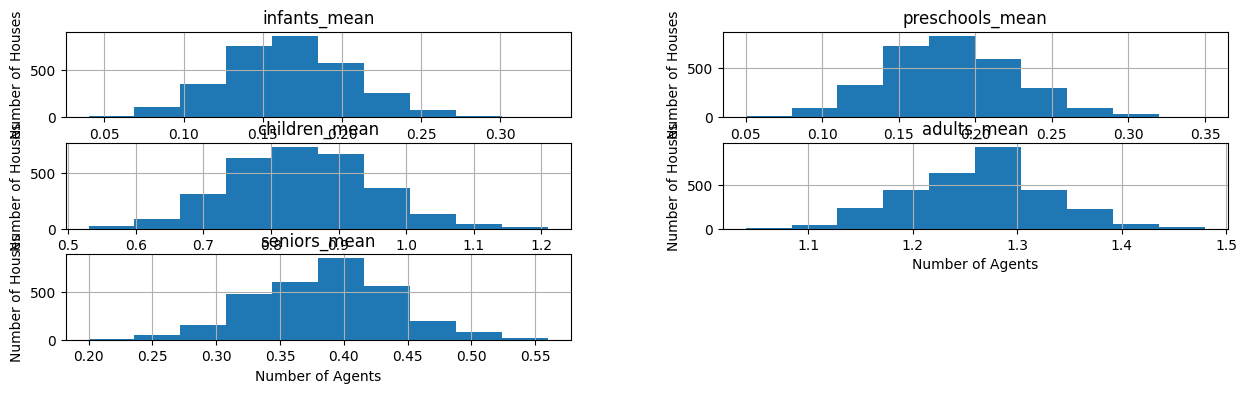

In [4]:
print(f"Number of houses: {len(census_df)}")
print(f"Number of infants: {census_df['infants_mean'].sum()}")
print(f"Number of preschools: {census_df['preschools_mean'].sum()}")
print(f"Number of children: {census_df['children_mean'].sum()}")
print(f"Number of adults: {census_df['adults_mean'].sum()}")
print(f"Number of seniors: {census_df['seniors_mean'].sum()}")
print(f"Total poulation: {census_df['infants_mean'].sum() + census_df['preschools_mean'].sum() + census_df['children_mean'].sum() + census_df['adults_mean'].sum() + census_df['seniors_mean'].sum()}")

census_fields = [f"{age}_mean" for age in ["infants", "preschools", "children", "adults", "seniors"]]
axarr = census_df[census_fields].hist(figsize=(15, 4))

for ax in axarr.flatten():
    ax.set_xlabel("Number of Agents")
    ax.set_ylabel("Number of Houses")

## Infections

A plot of the number of symptomatic infections each day.

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Covid Symptomatic Infections'}, xlabel='Day'>,
        <Axes: title={'center': 'Flu Symptomatic Infections'}, xlabel='Day'>,
        <Axes: title={'center': 'Rsv Symptomatic Infections'}, xlabel='Day'>],
       dtype=object))

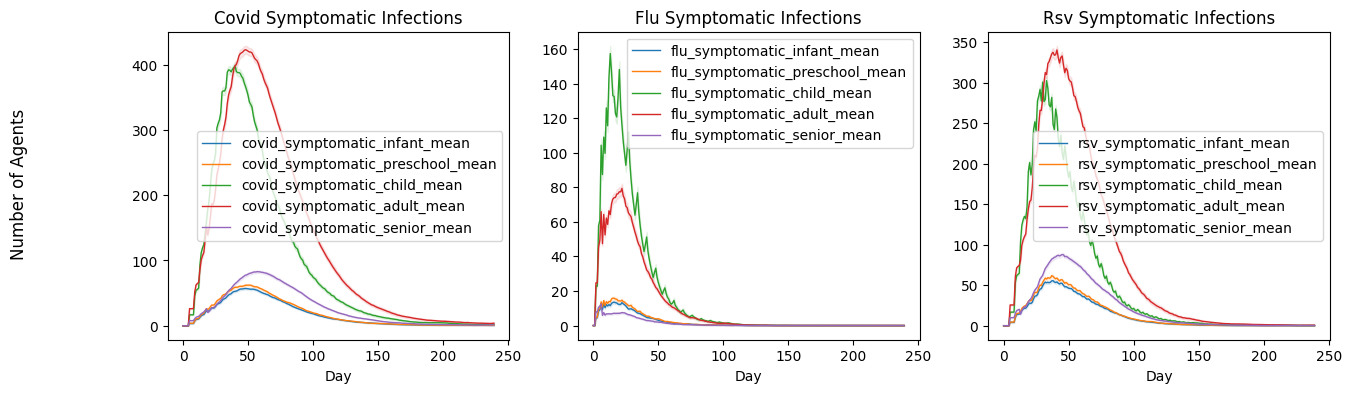

In [5]:
plot_curves([[f"{virus}_symptomatic_{age}_mean" for age in age_groups] for virus in virus_names],
                            [f"{virus.capitalize()} Symptomatic Infections" for virus in virus_names])

## Recovery

A plot of the number recovered each day.

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Covid Recovered'}, xlabel='Day'>,
        <Axes: title={'center': 'Flu Recovered'}, xlabel='Day'>,
        <Axes: title={'center': 'Rsv Recovered'}, xlabel='Day'>],
       dtype=object))

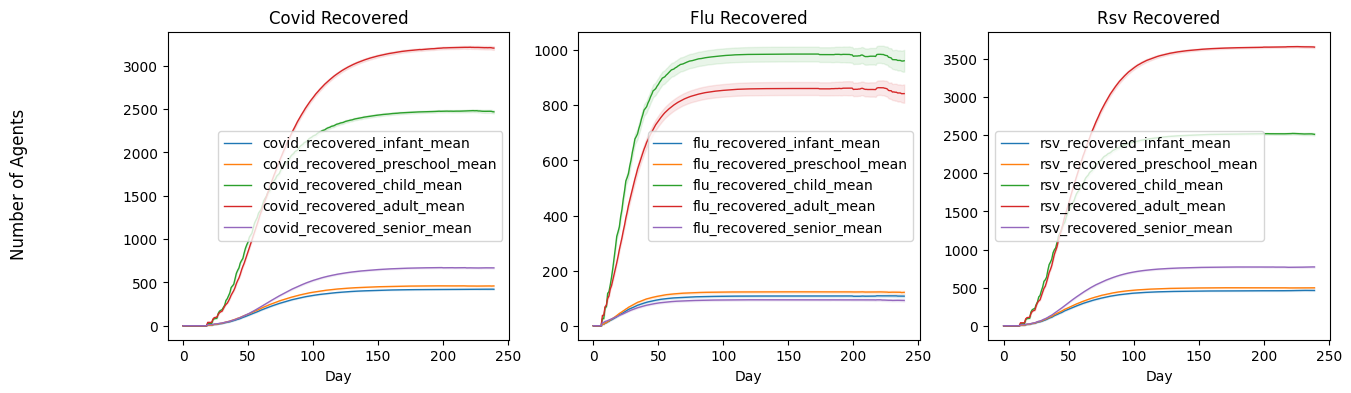

In [6]:
plot_curves([[f"{virus}_recovered_{age}_mean" for age in age_groups] for virus in virus_names],
                            [f"{virus.capitalize()} Recovered" for virus in virus_names])

## Hospitalizations per Week

A plot of the number of hospitalizations per week.

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Covid Total Weekly Hospitalizations'}, xlabel='Week'>,
        <Axes: title={'center': 'Flu Total Weekly Hospitalizations'}, xlabel='Week'>,
        <Axes: title={'center': 'Rsv Total Weekly Hospitalizations'}, xlabel='Week'>],
       dtype=object))

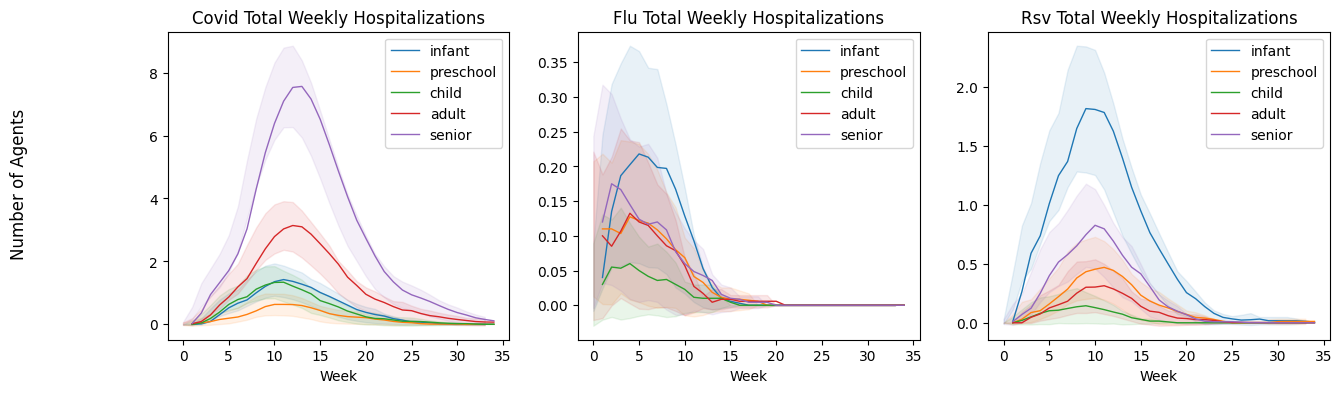

In [13]:
#plot_curves([[f"{virus}_hospitalized_{age}_mean" for age in age_groups] for virus in virus_names],
#                            [f"{virus.capitalize()} Hospitalized" for virus in virus_names],
#           smoothed=True)

plot_weekly_hosp(age_groups, [f"{virus.capitalize()} Total Weekly Hospitalizations" for virus in virus_names],
                confidence_interval = True, percentile_band = False, smoothed = True)

## Tests Used

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Covid Tests Used'}, xlabel='Day'>,
        <Axes: title={'center': 'Flu Tests Used'}, xlabel='Day'>,
        <Axes: title={'center': 'Rsv Tests Used'}, xlabel='Day'>],
       dtype=object))

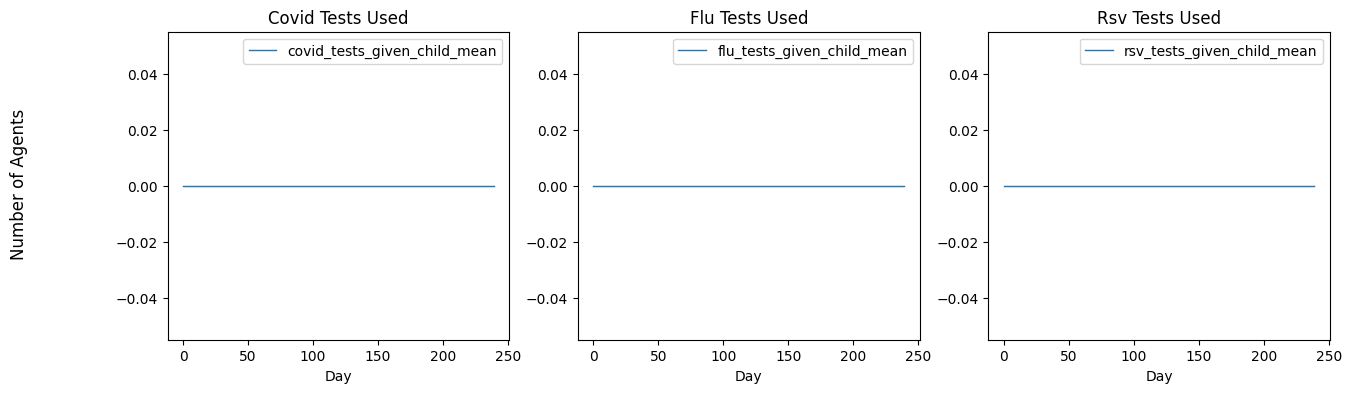

In [14]:
plot_curves([[f"{virus}_tests_given_{age}_mean" for age in ["child"]] for virus in virus_names],
                            [f"{virus.capitalize()} Tests Used" for virus in virus_names])

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Covid Test Results'}, xlabel='Day'>,
        <Axes: title={'center': 'Flu Test Results'}, xlabel='Day'>,
        <Axes: title={'center': 'Rsv Test Results'}, xlabel='Day'>],
       dtype=object))

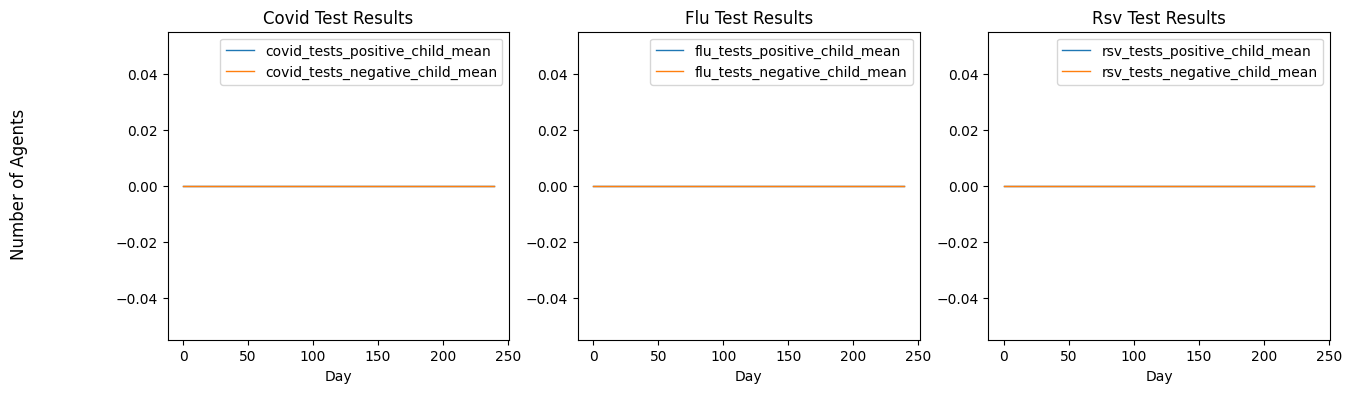

In [9]:
plot_curves([[virus + "_tests_positive_child_mean", virus + "_tests_negative_child_mean"] for virus in virus_names],
                            [f"{virus.capitalize()} Test Results" for virus in virus_names])

## Infections by Location

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Covid Infections by Location'}, xlabel='Day'>,
        <Axes: title={'center': 'Flu Infections by Location'}, xlabel='Day'>,
        <Axes: title={'center': 'Rsv Infections by Location'}, xlabel='Day'>],
       dtype=object))

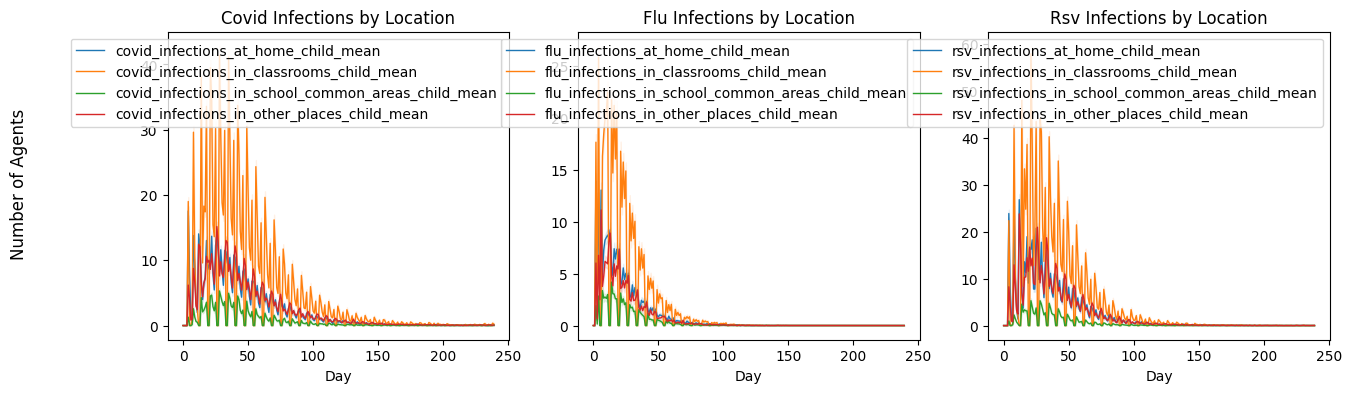

In [10]:
plot_curves([[f"{virus}_infections_at_home_child_mean", 
              f"{virus}_infections_in_classrooms_child_mean", 
              f"{virus}_infections_in_school_common_areas_child_mean", 
              f"{virus}_infections_in_other_places_child_mean"] for virus in virus_names],
                            [f"{virus.capitalize()} Infections by Location" for virus in virus_names])

## School Absenteeism

Number of students absent from school each day due to quarantine.

Text(0.5, 1.0, 'School Absenteeism')

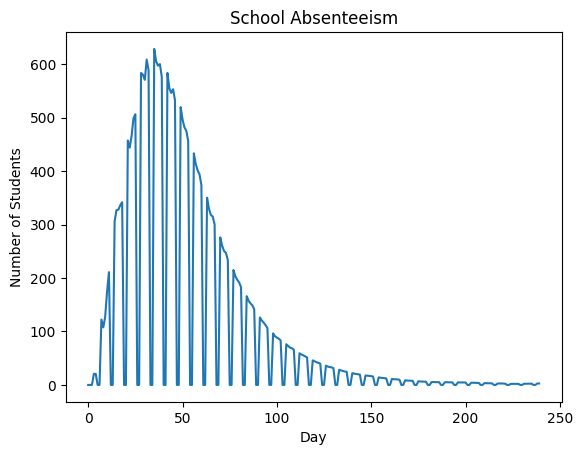

In [11]:
#plot_curves(["school_days_lost_mean", "school_days_lost_mean", "school_days_lost_mean"], ["School Days Lost", "", ""])
dynamics_df["school_days_lost_mean"].plot()
plt.xlabel("Day")
plt.ylabel("Number of Students")
plt.title("School Absenteeism")